In [ ]:

import warnings
warnings.filterwarnings('ignore')
!pip install idx2numpy

  Created wheel for idx2numpy: filename=idx2numpy-1.2.3-py3-none-any.whl size=7917 sha256=8013b3d1b5017077fa7296276cd8329f9885d1fadbb0940e8419bdb5af89a19b
  Stored in directory: /root/.cache/pip/wheels/1a/ce/ad/d5e95a35cfe34149aade5e500f2edd535c0566d79e9a8e1d8a
Successfully built idx2numpy



#                                                           **Q1**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# loading dataset

df = pd.read_csv (r'/content/drive/MyDrive/ML Data/iris.data',names = ["sepal length","sepal width","petal length","petal width","class"])
df

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


**Q1.1 b**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal length  150 non-null    float64
 1   sepal width   150 non-null    float64
 2   petal length  150 non-null    float64
 3   petal width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


### **Q1.1 c**

<Figure size 1440x1440 with 0 Axes>

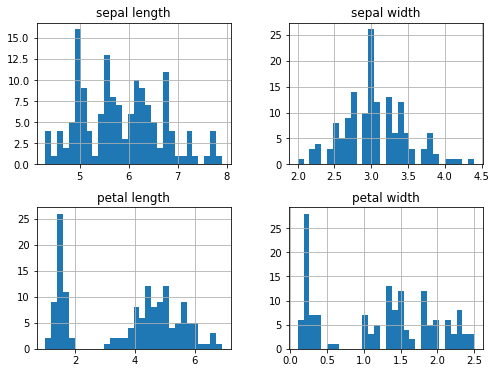

In [ ]:

df.iloc[:,:-1].hist(bins=30,figsize=(8,6))

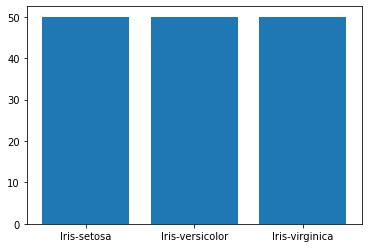

In [ ]:
classes=df["class"].unique()
class_count=np.array(df["class"].value_counts())
plt.bar(classes,class_count)
plt.show()

### **Q1.2**

In [ ]:
import idx2numpy
import numpy as np
train_img_3D = idx2numpy.convert_from_file('/content/drive/MyDrive/ML Data/train-images.idx3-ubyte')
train_img=train_img_3D.flatten().reshape(60000,784)
train_labels= idx2numpy.convert_from_file('/content/drive/MyDrive/ML Data/train-labels.idx1-ubyte')


**Q1.2. b**

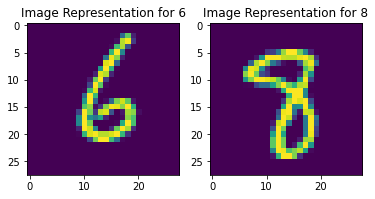

In [ ]:
def display(image,label):
    img=image.reshape(28,28);
    plt.title("Image Representation for %d" %(label))
    plt.imshow(img);

rand1= np.random.randint(60000)
rand2= np.random.randint(60000)
plt.subplot(1,2,1)
display(train_img[rand1],train_labels[rand1])
plt.subplot(1,2,2)
display(train_img[rand2],train_labels[rand2])





**Q1.2. c**

In [ ]:
from sklearn.manifold import TSNE
import seaborn as sn

# taking only first 10000 datasets due to computation power unavailability
data=train_img[:10000]
labels=train_labels[:10000]

model=TSNE(n_components=2, random_state=0)
tsne_data = model.fit_transform(data)

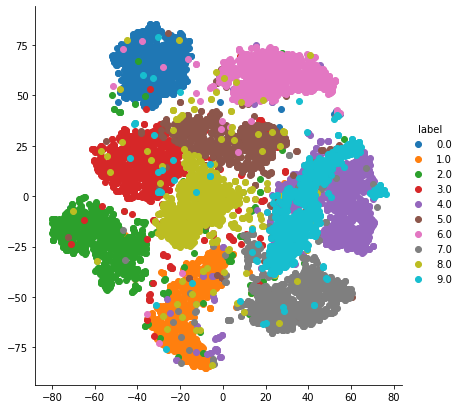

In [ ]:
tsne_data = np.vstack((tsne_data.T, labels)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))
sn.FacetGrid(tsne_df, hue="label", height=6).map(plt.scatter,"Dim_1","Dim_2").add_legend().set_axis_labels("","")
plt.show()

Here, the scatter plot shows different clusters of the data and we can we can see the labels(0-9 numbers) which look similar to each other have their clusters closer to each other in comparison to the labels that look distinct . 

# **Q2**


In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

df=pd.read_csv(r'/content/drive/MyDrive/ML Data/abalone.data',names=['sex','length','diameter','height','whole height','shucked height','viscera height','shell weight','rings'])
df_feature=df.iloc[:,:-1]
df_feature=pd.get_dummies(df_feature)
df_label=df.iloc[:,-1]
#spliting data- 10% test and 90% training set
train_x,test_x,train_y,test_y= train_test_split(df_feature,df_label,test_size=0.1)
# train_x=np.array(train_x)
# train_y=np.array(train_y)
# test_x=np.array(test_x)
# test_y=np.array(test_y)
# cols= ["length","diameter","height","whole height","shucked height","viscera height","shell weight"]
# #standardizing test & data set
# for i in cols:
#   stand= StandardScaler().fit(train_x[[i]])
#   train_x[i]=stand.transform(train_x[[i]])
#   test_x[i]=stand.transform(test_x[[i]])

train_x=np.array(train_x)
train_y=np.array(train_y)
test_x=np.array(test_x)
test_y=np.array(test_y)









array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f99129efa50>,
      dtype=object)

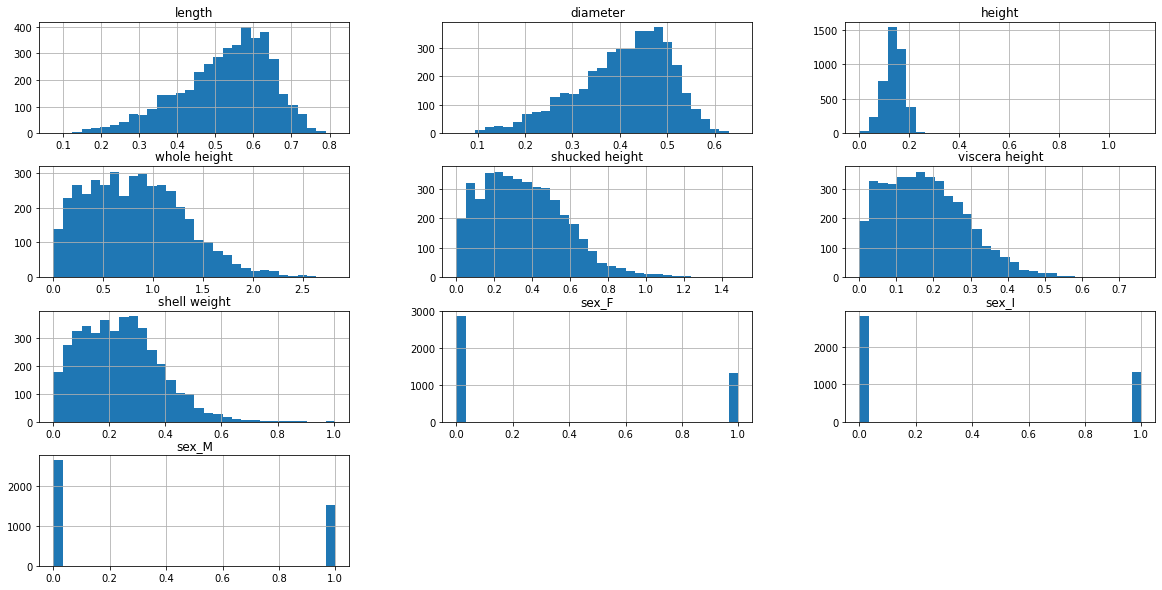

In [ ]:
df_feature.hist(bins=30,figsize=(20,10))

###**Q2. a**

[2.7518397620173887, 2.7461272384985183, 2.5091440751598926, 2.42595372595097, 2.1516971928510924]
[2.704574317074139, 2.6699178570035844, 2.409060881101631, 2.3266616850197424, 2.05947750316725]
[2.6287663270429658, 2.549526198984555, 2.2939342274883847, 2.2318721502000773, 2.005849138596549]
[2.481985175847133, 2.3863949034957033, 2.1978023594045917, 2.1753016216408447, 2.0048336375287725]


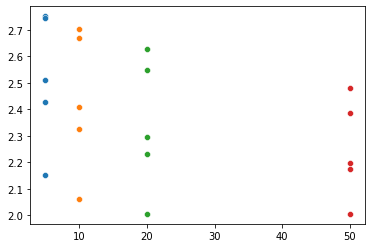

In [ ]:

#5-fold implementation
k = 5
kf = KFold(n_splits=k, random_state=0,shuffle=True)
col_x=train_x.shape[1]
theta=np.zeros(col_x)


#hypotheses function
def h(x,theta):
    return np.dot(x,theta)


# k-fold Linear regression

def kFoldLr(alpha,num_iteration):
    rmse_models=[]
    theta=np.zeros(col_x)
    for train_set,val_set in kf.split(train_x):  
        for itr_num in range(num_iteration):
            for j in range(col_x):
                grad_desc=0
                for idx in train_set:
                    grad_desc+= (train_y[idx]-h(train_x[idx],theta))*train_x[idx][j]
                theta[j]= theta[j] + (alpha*grad_desc)
            # cost function
            # cost=0
            # for idx in train_set:
            #     cost+= (train_y[idx]-h(train_x[idx],theta))**2 
            # cost += lemda*sum(np.absolute(theta))
            # cost /= train_set.size
            # print("cost for itr ",itr_num,"= ",cost)
        
        
        # rmse from validation set
        err=0
        for idx in val_set:
            err+= (train_y[idx]-h(train_x[idx],theta))**2
        err/= (val_set.size)        
        err=err**0.5
        rmse_models.append(err)
    return theta,rmse_models           #return rmse values form 5 models


iter=[5,10,20,50]

for i in range(len(iter)):
    w1,rmse=kFoldLr(0.001,iter[i])
    sns.scatterplot(x=iter[i],y=rmse)
    print(rmse)

# here we have thake learning rate=0.001



###**Q2. b**

[2.608373651656779, 2.744099133477272, 2.559582086798892, 2.399170428037917, 2.5009724981882484]
[2.5625596674749485, 2.663374466798703, 2.4526525287863716, 2.288361533846788, 2.3760833078122805]
[2.4995784790849984, 2.5440110841358097, 2.3257467852350007, 2.1926329294449096, 2.2856150514768085]


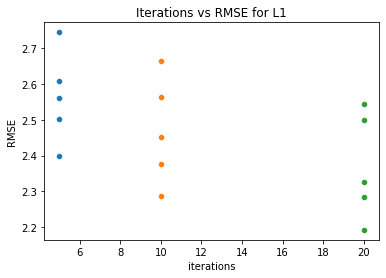

In [ ]:
                                              #lasso regression

# k-fold Linear regression
def lasso(alpha,num_iteration,lemda):
    rmse_models=[]
    theta=np.zeros(col_x)
    for train_set,val_set in kf.split(train_x):  
        for itr_num in range(num_iteration):
            for j in range(col_x):
                grad_desc=0
                for idx in train_set:
                    grad_desc+= (train_y[idx]-h(train_x[idx],theta))*train_x[idx][j]
                theta[j]= theta[j] + (alpha*grad_desc) + lemda
            # cost function
            # cost=0
            # for idx in train_set:
            #     cost+= (train_y[idx]-h(train_x[idx],theta))**2 
            # cost += lemda*sum(np.absolute(theta))
            # cost /= train_set.size
            # print("cost for itr ",itr_num,"= ",cost)
        
        
        # rmse from validation set
        err=0
        for idx in val_set:
            err+= (train_y[idx]-h(train_x[idx],theta))**2
        err += sum(np.absolute(theta))
        err/= (val_set.size)        
        err=err**0.5
        rmse_models.append(err)
    return theta,rmse_models           #return rmse values form 5 models


iter=[5,10,20]

# learning rate=0.001 and lembda=0.01
for i in range(len(iter)):
    w2,rmse=lasso(0.001,iter[i],0.01)
    sns.scatterplot(x=iter[i],y=rmse)
    print(rmse)

plt.xlabel("iterations")
plt.ylabel("RMSE")
plt.title("Iterations vs RMSE for L1")
plt.show()




[2.6715554748372603, 2.8215817480752228, 2.651694033252137, 2.508268720032833, 2.6134616082446844]
[2.64094776365126, 2.765906077542455, 2.576164730569984, 2.451098712959173, 2.5628554554999603]
[2.6030095600761816, 2.6978272627029454, 2.5618555177884863, 2.622705914558639, 2.936865756738627]


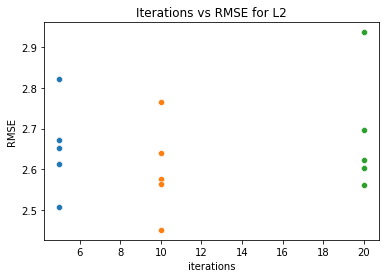

In [ ]:
                                              #ridge regression

# k-fold Linear regression
def ridge(alpha,num_iteration,lemda):
    rmse_models=[]
    theta=np.zeros(col_x)
    for train_set,val_set in kf.split(train_x):  
        for itr_num in range(num_iteration):
            for j in range(col_x):
                grad_desc=0
                for idx in train_set:
                    grad_desc+= (train_y[idx]-h(train_x[idx],theta))*train_x[idx][j]
                theta[j]= theta[j] + (alpha*grad_desc) - lemda*theta[j]
            # cost function
            # cost=0
            # for idx in train_set:
            #     cost+= (train_y[idx]-h(train_x[idx],theta))**2 
            # cost += lemda*sum(np.absolute(theta))
            # cost /= train_set.size
            # print("cost for itr ",itr_num,"= ",cost)
        
        
        # rmse from validation set
        err=0
        for idx in val_set:
            err+= (train_y[idx]-h(train_x[idx],theta))**2
        err += sum(np.square(theta))
        err/= (val_set.size)        
        err=err**0.5
        rmse_models.append(err)
    return theta,rmse_models           #return rmse values form 5 models


iter=[5,10,20]
error=[]

# learning rate=0.001 and lembda=0.01
for i in range(len(iter)):
    w3,rmse= ridge(0.001,iter[i],0.01)
    sns.scatterplot(x=iter[i],y=rmse)
    print(rmse)

plt.xlabel("iterations")
plt.ylabel("RMSE")
plt.title("Iterations vs RMSE for L2")
plt.show()





###                                        **Q2. c**
                                                           

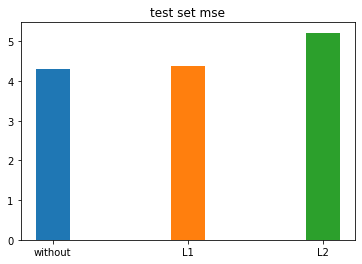

In [ ]:
from sklearn.metrics import mean_squared_error

# test_acc=0
# for i in range(len(test_x)):
#   test_acc+=(test_y[i]-h(test_x[i],w1))**2
# test_acc/= test_x.shape[0]
plt.bar(0,mean_squared_error(test_y,test_x@w1),0.25)

# test_acc=0
# for i in range(len(test_x)):
#   test_acc+=(test_y[i]-h(test_x[i],w2))**2
# test_acc/= test_x.shape[0]
plt.bar(1,mean_squared_error(test_y,test_x@w2),0.25)

# test_acc=0
# for i in range(len(test_x)):
#   test_acc+=(test_y[i]-h(test_x[i],w3))**2
# test_acc/= test_x.shape[0]
plt.bar(2,mean_squared_error(test_y,test_x@w3),0.25)

plt.xticks([0,1,2],["without","L1","L2"])
plt.title("test set mse")
plt.show()


### **Q2. d**

test err for model1= 4.317161450545753
test err for model2= 4.27164341371575
test err for model3= 4.277280780647273


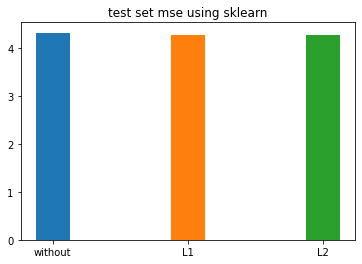

In [ ]:

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

df=pd.read_csv(r'/content/drive/MyDrive/ML Data/abalone.data',names=['sex','length','diameter','height','whole height','shucked height','viscera height','shell weight','rings'])
df_feature=df.iloc[:,:-1]
df_feature=pd.get_dummies(df_feature)
df_label=df.iloc[:,-1]
#spliting data- 10% test and 90% training set
train_x,test_x,train_y,test_y= train_test_split(df_feature,df_label,test_size=0.1,shuffle=False)

cols= ["length","diameter","height","whole height","shucked height","viscera height","shell weight"]
# #standardizing test & data set
# for i in cols:
#   stand= StandardScaler().fit(train_x[[i]])
#   train_x[i]=stand.transform(train_x[[i]])
#   test_x[i]=stand.transform(test_x[[i]])

train_x=np.array(train_x)
train_y=np.array(train_y)
test_x=np.array(test_x)
test_y=np.array(test_y)



# for train_idx, val_idx in kf.split(train_x):
#     x_train , x_val = train_x[train_idx,:],train_x[val_idx,:]
#     y_train , y_val = train_y[train_idx] , train_y[val_idx]

#     model=LinearRegression()
#     model.fit(x_train,y_train)
#     mse=mean_squared_error(y_val,model.predict(x_val))
#     if(mse<err1):
#       err1=mse
#       model1=model

#     model=Lasso(alpha=0.01)
#     model.fit(x_train,y_train)
#     mse=mean_squared_error(y_val,model.predict(x_val))
#     if(mse<err2):
#       err2=mse
#       model2=model

#     model=Ridge(alpha=1)
#     model.fit(x_train,y_train)
#     mse=mean_squared_error(y_val,model.predict(x_val))
#     if(mse<err3):
#       err3=mse
#       model3=model
model1= LinearRegression().fit(train_x,train_y)
model2= Lasso(alpha=0.001).fit(train_x,train_y)
model3= Ridge(alpha=2).fit(train_x,train_y)

test_err=mean_squared_error(test_y,model1.predict(test_x))
print("test err for model1=",test_err)
plt.bar(0,test_err,0.25)
test_err=mean_squared_error(test_y,model2.predict(test_x))
print("test err for model2=",test_err)
plt.bar(1,test_err,0.25)
test_err=mean_squared_error(test_y,model3.predict(test_x))
print("test err for model3=",test_err)
plt.bar(2,test_err,0.25)

plt.xticks([0,1,2],["without","L1","L2"])
plt.title("test set mse using sklearn")
plt.show()


### **Q2. e**

In [ ]:

modeli=0
for train_idx, val_idx in kf.split(train_x):
  modeli+=1
  x_train , x_val = train_x[train_idx,:],train_x[val_idx,:]
  y_train , y_val = train_y[train_idx] , train_y[val_idx]

  # normal equation (closed form) for linear regression
  theta= np.linalg.inv(np.transpose(x_train)@x_train)@np.transpose(x_train)@y_train
  mse = mean_squared_error(y_val,x_val@theta)
  print("mse for model",modeli," = ",mse)





mse for model 1  =  5.0040500253146725
mse for model 2  =  5.018084909369004
mse for model 3  =  4.783313929136972
mse for model 4  =  5.252756282087939
mse for model 5  =  4.608845587491214
